<a href = "https://colab.research.google.com/github/flyingzaptop/pyton-colab/blob/main/%D0%94%%D0%D0%BC%BC%B0%B0%Dogresarlygesarn%8%%8% 8. „https://colab.research.google.com/assets/colab-badge.svg” alt = "Otwórz w colab"/> </a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[Opis danych] (https://search.r-project.org/cran/refmans/pptreregviz/html/insurance.html)

In [126]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/insurance.csv")
df = df.select_dtypes('number')

In [127]:
df

,age,bmi,children,expenses
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86
...,...,...,...,...
1333,50,31.0,3,10600.55
1334,18,31.9,0,2205.98
1335,18,36.9,0,1629.83
1336,21,25.8,0,2007.95


# Zadanie 1
Wydaj główne cechy numeryczne i liczbę brakujących wartości przez kolumny

In [128]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [129]:
df.isna().sum()

,0
age,0
bmi,0
children,0
expenses,0


# Zadanie 2
Podziel dane na zależne Y („wydatki”) i niezależne znaki X. Podziel dane na części szkoleniowe i testowe

In [130]:
df.corr(method = 'pearson')

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


<Axes: xlabel='age', ylabel='expenses'>

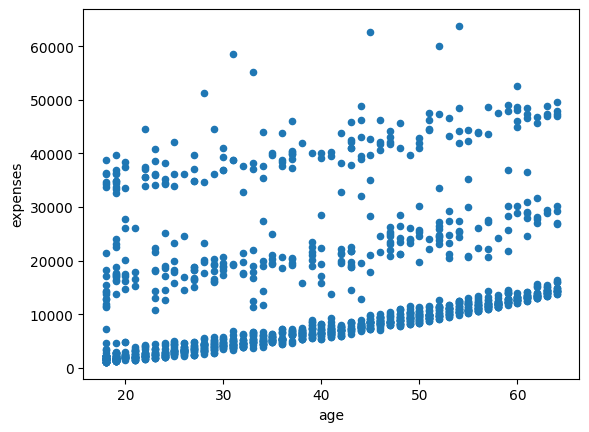

In [131]:
df.plot.scatter(x='age', y='expenses')

In [145]:
y = df['expenses']
X = df.drop('expenses',axis =1)
X = X.drop('children',axis =1)
X = X.drop('bmi',axis =1)


In [162]:
y

,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86
...,...
1333,10600.55
1334,2205.98
1335,1629.83
1336,2007.95


In [163]:
X

,age
0,19
1,18
2,28
3,33
4,32
...,...
1333,50
1334,18
1335,18
1336,21


In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [164]:
X_train

,age
560,46
1285,47
1142,52
969,39
486,54
...,...
1095,18
1130,39
1294,58
860,37


# Zadanie 3
Zawieś model i usuń następujące wskaźniki: MAE, RMSE, R2

In [172]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [173]:
model.coef_

array([240.59656289])

In [174]:
model.intercept_

3876.9286950300375

In [175]:
from sklearn import metrics

def get_metrics(y_true, y_pred, name = "model" ):
  df = pd.DataFrame()
  df.loc["MAE",name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["MSE",name] = metrics.mean_squared_error(y_true, y_pred)
  df.loc["RMSE",name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2",name] = metrics.r2_score(y_true, y_pred)
  return df.round(2)

In [176]:
y_pred = model.predict(X_test)
y_pred

array([14703.77402497, 12538.40495898, 19275.10871983, 14944.37058785,
        8448.26338989, 12057.2118332 ,  8448.26338989, 19275.10871983,
       10613.63245588, 15666.16027652, 11094.82558165, 13741.38777342,
       10854.22901877, 14944.37058785, 18312.72246828, 15184.96715074,
       15666.16027652, 15184.96715074, 14944.37058785, 14222.58089919,
        9891.84276722, 14222.58089919,  8448.26338989,  9170.05307855,
       15906.7568394 , 16869.14309095, 18312.72246828, 10373.03589299,
       15184.96715074,  8207.666827  , 13500.79121053, 17590.93277962,
        8929.45651567, 11094.82558165, 10132.4393301 , 14703.77402497,
        8929.45651567, 14222.58089919, 16387.94996518, 12538.40495898,
        8448.26338989,  9170.05307855, 17350.33621673, 18072.12590539,
       11816.61527032, 18072.12590539,  8929.45651567,  9891.84276722,
       14222.58089919, 11335.42214454, 19034.51215694,  8207.666827  ,
       13500.79121053,  8207.666827  , 17350.33621673, 15906.7568394 ,
      

In [177]:
y_train

,expenses
560,9193.84
1285,8534.67
1142,27117.99
969,8596.83
486,12475.35
...,...
1095,4561.19
1130,8582.30
1294,11931.13
860,46113.51


In [171]:
all_metrics = pd.DataFrame()
all_metrics['train'] = get_metrics(y_train, model.predict(X_train))
all_metrics['test'] = get_metrics(y_test, y_pred)
all_metrics = all_metrics.applymap(lambda x: round(x / 10, 2))
all_metrics

<ipython-input-171-c558eb55f6f1>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  all_metrics = all_metrics.applymap(lambda x: round(x / 10, 2))


,train,test
MAE,890.34,884.35
MSE,13458106.77,13459559.84
RMSE,1160.09,1160.15
R2,0.01,0.01


Jakoś niezbyt XD. Wybrałem kolumny o najwyższej korelacji 0,3. Może coś się zdezorientowało. R2 wygląda bardzo źle, chociaż inne wskaźniki są dobre

# Zadanie 4
Napisz równanie regresji jako przykład:
Cena = 1,02*Temperatura - 15,6

In [179]:
#expences = 240.597 * age + 3876.929

# Zadanie 5 (optymalnie)
Sprawdź, w jaki sposób emisje wpłyną na wynik. Rozważ jedną z opcji:
* Usuwanie emisji w kolumnie „wydatki”
* Usuwanie emisji na wszystkich kolumnach

<Axes: xlabel='age', ylabel='expenses'>

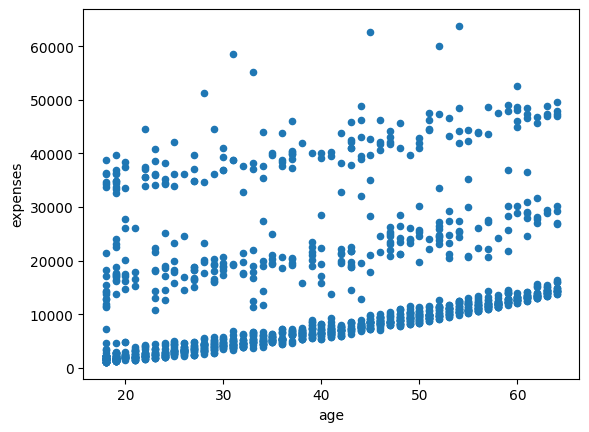

In [180]:
df.plot.scatter(x='age', y='expenses')

<Axes: >

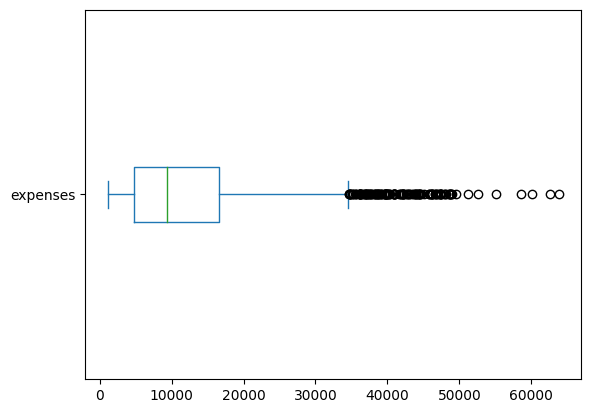

In [193]:
df.plot.box(column='expenses',vert = False)

<Axes: >

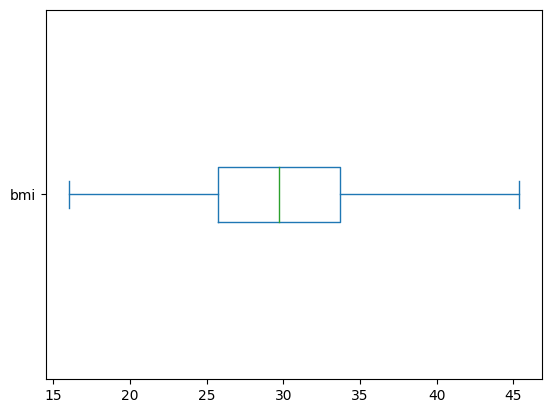

In [198]:
df.plot.box(column='bmi',vert = False)

In [194]:
q1 = df['expenses'].quantile(0.25)
q3 = df['expenses'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

df = df[(df['expenses'] > lower) & (df['expenses'] < upper)]

In [195]:
q1 = df['bmi'].quantile(0.25)
q3 = df['bmi'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

df = df[(df['bmi'] > lower) & (df['bmi'] < upper)]

<Axes: >

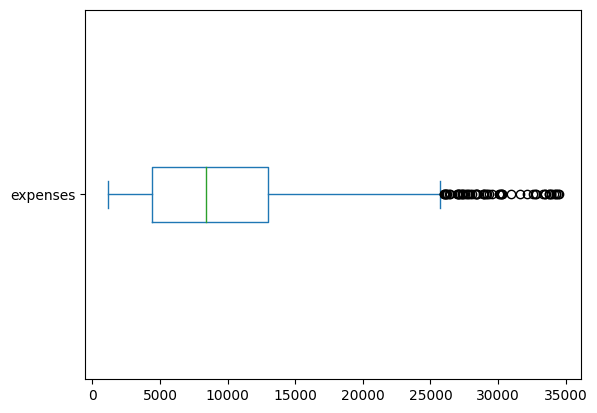

In [196]:
df.plot.box(column='expenses',vert = False)

<Axes: >

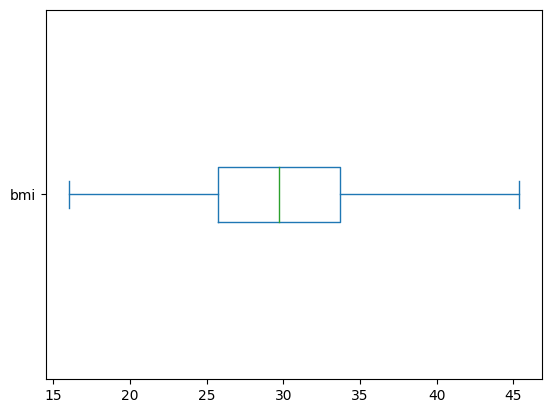

In [197]:
df.plot.box(column='bmi',vert = False)

In [199]:
df.corr(method = 'pearson')

,age,bmi,children,expenses
age,1.000000,0.124802,0.038125,0.435942
bmi,0.124802,1.000000,-0.010185,-0.056684
children,0.038125,-0.010185,1.000000,0.084167
expenses,0.435942,-0.056684,0.084167,1.000000


Korelacja kosztów i wieku jest nieco lepsza. Prawie 0,45

In [204]:
y = df['expenses']
X = df.drop('expenses',axis =1)
X = X.drop('children',axis =1)
X = X.drop('bmi',axis =1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


In [206]:
y_pred = model.predict(X_test)
y_pred

array([15666.16027652,  8929.45651567,  8207.666827  , 11094.82558165,
       13741.38777342, 14703.77402497,  8207.666827  , 15425.56371363,
        8207.666827  , 14463.17746208,  9651.24620433, 14222.58089919,
       15184.96715074,  8929.45651567,  9170.05307855, 17350.33621673,
       16387.94996518, 17350.33621673, 13260.19464764, 17831.5293425 ,
       17109.73965384, 17590.93277962, 18312.72246828, 13981.9843363 ,
       16628.54652807, 18312.72246828, 12538.40495898, 15906.7568394 ,
       12538.40495898, 15666.16027652,  9170.05307855, 10613.63245588,
       11094.82558165, 18793.91559405, 13260.19464764, 19034.51215694,
        8207.666827  , 14944.37058785, 19275.10871983,  8207.666827  ,
       17590.93277962, 11335.42214454, 10854.22901877, 16869.14309095,
        9170.05307855, 14222.58089919, 17109.73965384, 14703.77402497,
       14703.77402497, 11576.01870743, 16147.35340229, 14463.17746208,
       15425.56371363, 17831.5293425 , 18072.12590539, 18553.31903117,
      

In [207]:
all_metrics = pd.DataFrame()
all_metrics['train'] = get_metrics(y_train, model.predict(X_train))
all_metrics['test'] = get_metrics(y_test, y_pred)
all_metrics = all_metrics.applymap(lambda x: round(x / 10, 2))
all_metrics

<ipython-input-207-c558eb55f6f1>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  all_metrics = all_metrics.applymap(lambda x: round(x / 10, 2))


,train,test
MAE,681.73,692.85
MSE,5294992.11,5633599.43
RMSE,727.67,750.57
R2,-0.00,-0.00


Cud jest niesamowity XD